
### Problem Definition
In a statement:

**Given the textual reviews, ratings, and other product-related attributes, can we predict the sentiment labels of reviews as positive, negative, or neutral?**

---

### Data
This dataset contains product reviews and related metadata, such as product prices, ratings, and textual review content. Each review is classified into a sentiment label: **positive**, **negative**, or **neutral**. 

---

### Features
Below is the data dictionary, describing each feature in detail:

1. **product_name**:  
   - Description: The name of the product that the review is associated with.  
   - Example: "Canon EOS 3000D DSLR Camera" or "OnePlus Bullets Wireless Z2 Headset".

2. **product_price**:  
   - Description: The price of the product in currency units. Higher prices might indicate premium products.  
   - Example: 30999 (for an expensive camera) or 1499 (for an affordable electric cooker).

3. **Rate**:  
   - Description: The numerical rating given by the reviewer, usually on a scale of 1 to 5.  
   - Values:  
     - 5: Excellent  
     - 4: Very Good  
     - 3: Good  
     - 2: Fair  
     - 1: Poor  

4. **Review**:  
   - Description: A short summary of the user’s opinion about the product.  
   - Example: "Mindblowing purchase" or "Very poor quality".  
   - Note: Often indicative of the overall sentiment but less detailed than the "text" feature.

5. **text**:  
   - Description: The detailed textual review written by the user, providing insights into their experience.  
   - Example:  
     - Positive: "The product is amazing, the sound quality and battery life are great."  
     - Negative: "Very poor quality, it stopped working after just one use."

6. **labels**:  
   - Description: The sentiment classification of the review. This is the target variable we aim to predict.  
   - Values:  
     - **positive**: Indicates a favorable review.  
     - **neutral**: Indicates a mixed or indifferent review.  
     - **negative**: Indicates a poor or unfavorable review.  

7. **sentiment_code**:  
   - Description: A numerical encoding of the labels for easier processing in machine learning models.  
   - Values:  
     - 2: Positive sentiment.  
     - 1: Neutral sentiment.  
     - 0: Negative sentiment.  



## Preparing the tools

We're going to use pandas, numpy ,Matplotlib and NUmpy for data analysis and manupulation

In [109]:
# Import all the tools we need

# Regular EDA and plotting Librarries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay,roc_curve,roc_auc_score,auc
from sklearn import metrics
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.preprocessing import label_binarize

## Load data

In [110]:
df = pd.read_csv("newlastmodified.csv")
df.shape, df.columns

((2000, 12),
 Index(['Unnamed: 0', 'product_name', 'product_price', 'Rate', 'Review', 'text',
        'labels', 'sentiment_code', 'common_name', 'model_count', 'custumer_id',
        'state'],
       dtype='object'))

## Data Exploration (exploatory data anylisis or EDA)
The gole here is to find out moreabout data and become a subject matter on the dataset you're working with
1. What questions are we trying to solve ?.
2. What kind of data do we have and how do we treat diffrent types ?
3. What's missing from the data how we deal with it ?
4. Where are the outliers and why should you care about them ?
5. How can you add change or remove features to get more out of your data ?

In [111]:
df.head()

,Unnamed: 0,product_name,product_price,Rate,Review,text,labels,sentiment_code,common_name,model_count,custumer_id,state
0,0,canon eos 3000d dslr camera 1 camera body 18 ...,30999.0,5.0,mindblowing purchase,nice,positive,2,canon,NaN,405-8078784-5731545,MAHARASHTRA
1,1,flipkart smartbuy cfxb15 electric rice cooker1...,1499.0,2.0,moderate,very poor quality,negative,0,flipkart,2.0,171-9198151-1101146,KARNATAKA
2,2,google nest hub 2nd gen display with google as...,6999.0,5.0,awesome,far better and cheaper than alexa,positive,2,google,3.0,404-0687676-7273146,MAHARASHTRA
3,3,wd 15 tb wired external hard disk drive hddblack,4449.0,5.0,fabulous,i would like to suggest this for persons looki...,positive,2,wd,2.0,403-9615377-8133951,PUDUCHERRY
4,4,oneplus bullets wireless z2 bluetooth headseta...,1999.0,5.0,super,the product is amazing the sound quality and b...,positive,2,oneplus,2.0,407-1069790-7240320,TAMIL NADU


In [112]:
# Now we will delete the extra columns
df = df.drop('model_count',axis = 1)
df.head()

,Unnamed: 0,product_name,product_price,Rate,Review,text,labels,sentiment_code,common_name,custumer_id,state
0,0,canon eos 3000d dslr camera 1 camera body 18 ...,30999.0,5.0,mindblowing purchase,nice,positive,2,canon,405-8078784-5731545,MAHARASHTRA
1,1,flipkart smartbuy cfxb15 electric rice cooker1...,1499.0,2.0,moderate,very poor quality,negative,0,flipkart,171-9198151-1101146,KARNATAKA
2,2,google nest hub 2nd gen display with google as...,6999.0,5.0,awesome,far better and cheaper than alexa,positive,2,google,404-0687676-7273146,MAHARASHTRA
3,3,wd 15 tb wired external hard disk drive hddblack,4449.0,5.0,fabulous,i would like to suggest this for persons looki...,positive,2,wd,403-9615377-8133951,PUDUCHERRY
4,4,oneplus bullets wireless z2 bluetooth headseta...,1999.0,5.0,super,the product is amazing the sound quality and b...,positive,2,oneplus,407-1069790-7240320,TAMIL NADU


In [113]:
df["labels"].value_counts()

labels
positive    1608
negative     313
neutral       79
Name: count, dtype: int64

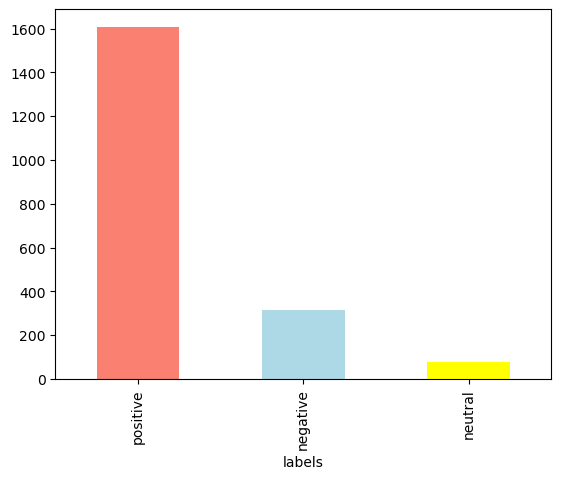

In [114]:
df["labels"].value_counts().plot(kind="bar",color=["salmon","lightblue","yellow"])
plt.show()

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   product_name    2000 non-null   object 
 2   product_price   2000 non-null   float64
 3   Rate            2000 non-null   float64
 4   Review          2000 non-null   object 
 5   text            2000 non-null   object 
 6   labels          2000 non-null   object 
 7   sentiment_code  2000 non-null   int64  
 8   common_name     2000 non-null   object 
 9   custumer_id     2000 non-null   object 
 10  state           1998 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB


In [116]:
df.isna().sum()

Unnamed: 0        0
product_name      0
product_price     0
Rate              0
Review            0
text              0
labels            0
sentiment_code    0
common_name       0
custumer_id       0
state             2
dtype: int64

In [117]:
df.describe()

,Unnamed: 0,product_price,Rate,sentiment_code
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,7150.353500,4.093000,1.647500
std,577.494589,10760.066713,1.361719,0.735877
min,0.000000,59.000000,1.000000,0.000000
25%,499.750000,699.000000,4.000000,2.000000
50%,999.500000,1999.000000,5.000000,2.000000
75%,1499.250000,7999.000000,5.000000,2.000000
max,1999.000000,52990.000000,5.000000,2.000000


### Data Frequency according to sentiment_code

In [118]:
df.sentiment_code.value_counts()

sentiment_code
2    1608
0     313
1      79
Name: count, dtype: int64

In [119]:
# Here we have converted the target values in numberic form 
df["labels"].replace("positive", 0,inplace=True)
df["labels"].replace("negative", 1,inplace=True)
df["labels"].replace("neutral", 2,inplace=True)

C:\Users\avk24\AppData\Local\Temp\ipykernel_46820\3073335976.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["labels"].replace("positive", 0,inplace=True)
C:\Users\avk24\AppData\Local\Temp\ipykernel_46820\3073335976.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [120]:
df.head()

,Unnamed: 0,product_name,product_price,Rate,Review,text,labels,sentiment_code,common_name,custumer_id,state
0,0,canon eos 3000d dslr camera 1 camera body 18 ...,30999.0,5.0,mindblowing purchase,nice,0,2,canon,405-8078784-5731545,MAHARASHTRA
1,1,flipkart smartbuy cfxb15 electric rice cooker1...,1499.0,2.0,moderate,very poor quality,1,0,flipkart,171-9198151-1101146,KARNATAKA
2,2,google nest hub 2nd gen display with google as...,6999.0,5.0,awesome,far better and cheaper than alexa,0,2,google,404-0687676-7273146,MAHARASHTRA
3,3,wd 15 tb wired external hard disk drive hddblack,4449.0,5.0,fabulous,i would like to suggest this for persons looki...,0,2,wd,403-9615377-8133951,PUDUCHERRY
4,4,oneplus bullets wireless z2 bluetooth headseta...,1999.0,5.0,super,the product is amazing the sound quality and b...,0,2,oneplus,407-1069790-7240320,TAMIL NADU


In [121]:
#Compare target with sentement code column
pd.crosstab(df.labels,df.sentiment_code)

sentiment_code,0,1,2
labels,,,
0,0,0,1608
1,313,0,0
2,0,79,0


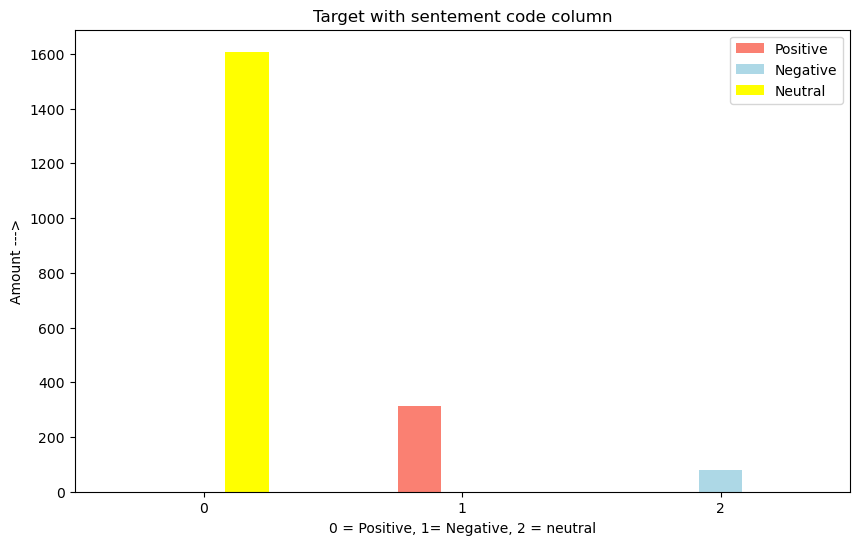

In [122]:
# Create a plot a crosstab
pd.crosstab(df.labels,df.sentiment_code).plot(kind='bar',
                                   figsize = (10,6),
                                   color =["salmon","lightblue","yellow"])
plt.title("Target with sentement code column")
plt.xlabel("0 = Positive, 1= Negative, 2 = neutral")
plt.ylabel("Amount --->")
plt.legend(["Positive","Negative","Neutral"]);
plt.xticks(rotation=0);
plt.show()

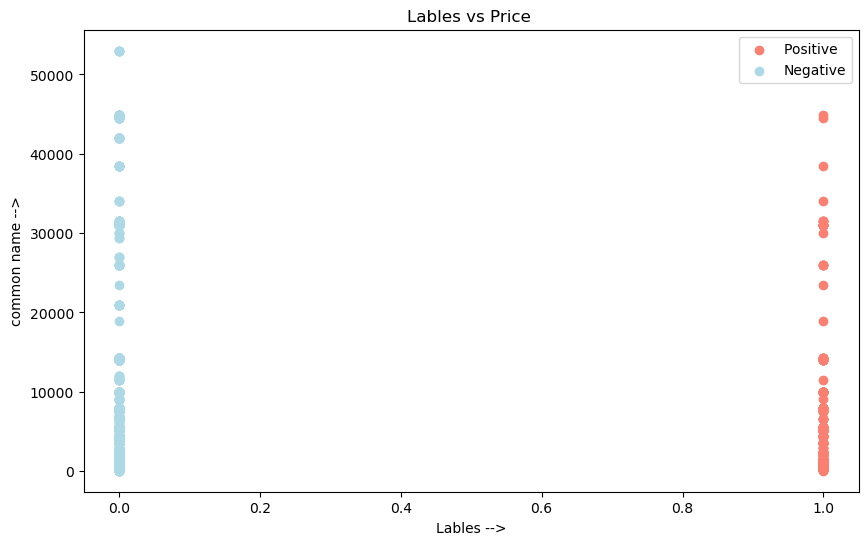

In [123]:
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.labels[df.labels==1],
            df.product_price[df.labels==1],
            c="salmon")
plt.scatter(df.labels[df.labels==0],
            df.product_price[df.labels==0],
            c="lightblue")
#Add some helful info
plt.title("Lables vs Price ")
plt.xlabel("Lables -->")
plt.ylabel("common name -->")
plt.legend(["Positive ","Negative","Neutral"])
plt.show();

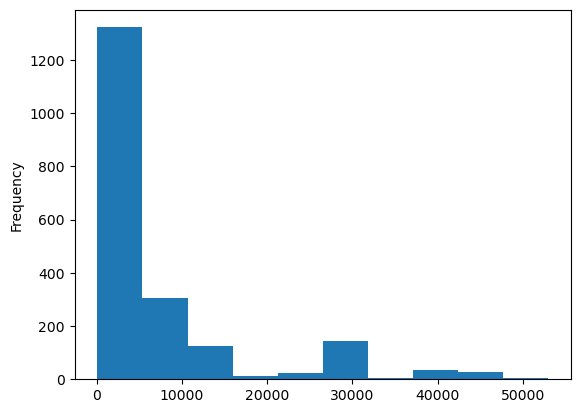

In [124]:
# Chech the distribution of age column with a histogram
df.product_price.plot.hist()
plt.show()

## 5. Modelling

In [125]:
# Split data into x & y
x = df.drop("sentiment_code", axis=1)
y = df["sentiment_code"]

In [126]:
x

,Unnamed: 0,product_name,product_price,Rate,Review,text,labels,common_name,custumer_id,state
0,0,canon eos 3000d dslr camera 1 camera body 18 ...,30999.0,5.0,mindblowing purchase,nice,0,canon,405-8078784-5731545,MAHARASHTRA
1,1,flipkart smartbuy cfxb15 electric rice cooker1...,1499.0,2.0,moderate,very poor quality,1,flipkart,171-9198151-1101146,KARNATAKA
2,2,google nest hub 2nd gen display with google as...,6999.0,5.0,awesome,far better and cheaper than alexa,0,google,404-0687676-7273146,MAHARASHTRA
3,3,wd 15 tb wired external hard disk drive hddblack,4449.0,5.0,fabulous,i would like to suggest this for persons looki...,0,wd,403-9615377-8133951,PUDUCHERRY
4,4,oneplus bullets wireless z2 bluetooth headseta...,1999.0,5.0,super,the product is amazing the sound quality and b...,0,oneplus,407-1069790-7240320,TAMIL NADU
...,...,...,...,...,...,...,...,...,...,...
1995,1995,hindware nevio plus 60 auto clean wall mounte...,13999.0,5.0,classy product,very good product vsiva prasad,0,hindware,405-5685412-1543569,KARNATAKA
1996,1996,sportsoul cotton gym athletic abdomen support...,249.0,5.0,terrific,good product,0,sportsoul,402-3947445-0289100,HARYANA
1997,1997,maharaja whiteline 65 l desert air coolerwhite...,7999.0,1.0,absolute rubbish,till now its goodrest well see,2,maharaja,402-8796273-3245106,DELHI
1998,1998,wd 15 tb wired external hard disk drive hddblack,4449.0,5.0,classy product,fastest,0,wd,171-1909591-0944310,MAHARASHTRA


In [127]:
y

0       2
1       0
2       2
3       2
4       2
       ..
1995    2
1996    2
1997    1
1998    2
1999    2
Name: sentiment_code, Length: 2000, dtype: int64

In [128]:
# Split data into train & test sets
np.random.seed(42)

#Split into train & test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [129]:
y_train,len(y_train)

(968     2
 240     2
 819     2
 692     2
 420     2
        ..
 1130    0
 1294    0
 860     2
 1459    2
 1126    0
 Name: sentiment_code, Length: 1600, dtype: int64,
 1600)

## Now we've got our data into train & test set , it's time to build a machine learning model

we will train it and (find patters) on the traning set.

And we will test it (use patterns) on the test set.

We are goint to try 3 machine learning model
1. Logistic Regression.
2. K-Nearest Neghbours Classifier.
3. Random Forest Classifire.

In [130]:
# Put models in a dictonary
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}
def fit_and_score(models,x_train,x_test,y_train,y_test):
    '''
    Fits and evaluate given machine learnings models.
    models : a dict of diffrent Scikit-learn machine learning models
    x_train : traning data(no labels)
    x_test:testing data(no lables)
    y_train : traning data(no labels)
    y_test:testing data(no lables)
    
    '''
    # Set random seed
    np.random.seed(42)
    #Make a dict to keep model scores
    model_scores = {}
    #Loop through model to the data
    for name,model in models.items(): # i.tems() is used for both keys & values 
        # Fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model & append its score to model_scores
        model_scores[name] = model.score(x_test,y_test)
    return model_scores
    

In [131]:
df.columns

Index(['Unnamed: 0', 'product_name', 'product_price', 'Rate', 'Review', 'text',
       'labels', 'sentiment_code', 'common_name', 'custumer_id', 'state'],
      dtype='object')

In [132]:
# Secand way to convert data into numbers 
df = pd.get_dummies(df[["text","common_name","Review"]],dtype=float)
df

,text_1best sounds quality 2 no1 bass 3 awesome look very comfortabl4 im used 79 hr per day battery backup amazing 3 day wow 5 im so happy for this product 6 thanks for flipkart for fast delivery,text_1got it for 4049 rs under some sales it gets to as low as 3799 i waited for it but this was the ongoing price so my need got me better2drive is good and worth the price3 usb 30 works with avg speeds upto 80120mbs20 speed is 2540mbs 4 wd hdds are good because i heard from hdd repair guy and data recovery guys its easier to recover and repair sony wd hitachi hdd but seagate sucks in many of its models5 its suited for storage not frequent processings,text_1no cooler,text_1sound quality is good 2bass is awesome 3button are to hard to power off4 design and build quality is fantastic 5made in india product,text_1st with the quality heavy and plastic bodyno display for mode indicatorgood rich sound outputmedium bass clear audioconnectivity is goodi bought it to use along with my projector it works good if the video quality audio is goodsmall and portableoverall good if the price was lesser,text_3rd class productdont buy itdelivery boy also a 3rd class personhe didnt return it,text_6 wicket good but just little,text_a decent one with one problemmy unit just heats to one side only,text_a good product,text_a very good product for its price good for a pack of 4 adults cooking utensils advised to scrub once before placing in to the machine,...,Review_very poor,Review_waste of money,Review_we got rid of the maid right away,Review_wonderful,Review_wonderful product and super saver,Review_worst experience ever,Review_worth every penny,Review_worth the money,Review_worth the money review on first use,Review_worthless
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
# Let's refill the model use to split the data into train and test
np.random.seed(42)

model = RandomForestClassifier()


x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2)

model.fit(x_train,y_train);

In [134]:
model.score(x_test,y_test)

0.9025

### 1.2 What if there were missing values ?
1.Fill them with some value (also known as imputation).

2.Remove the samples with missing data altogether.

In [135]:
model_scores = fit_and_score(models=models,
                              x_train=x_train,
                              x_test=x_test,
                              y_train=y_train,
                              y_test=y_test)
model_scores

{'Logistic Regression': 0.9025, 'KNN': 0.83, 'Random Forest': 0.9025}

### Model Comparison

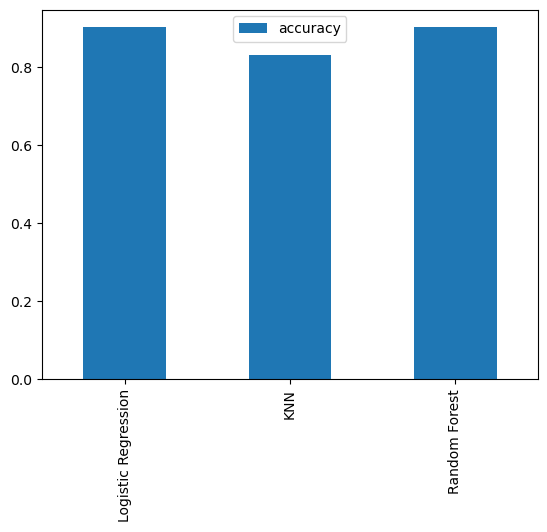

In [136]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();
plt.show();

Now we've got a baseline model...we know a model's first predictions aren't always what we should based our next steps off.What should we do ?

Let's look at the following:

* Hyperparameater tuning
* Feature importance
* Confusion matrix
* cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameater tuming

In [137]:
# Let's une KNN

train_score = []
test_score = []

#Creat a list of diffrent values for n_neghbors
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through diffrent n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit the algorithm
    knn.fit(x_train,y_train)
    # Update the traning scores list
    train_score.append(knn.score(x_train,y_train))
    # Update the test scores list
    test_score.append(knn.score(x_test,y_test))

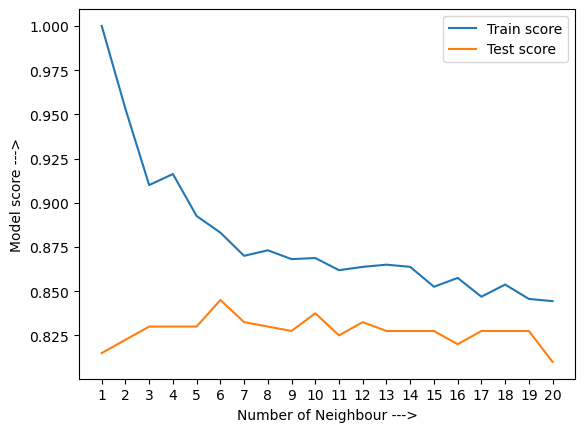

Maximum KNN score on the test data: 84.50%


In [138]:
plt.plot(neighbors,train_score,label="Train score")
plt.plot(neighbors,test_score,label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbour --->")
plt.ylabel("Model score --->")
plt.legend()
plt.show()
print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

## Hyperparameater tuning with RandamizeSearchCV

we're going to tune :

* LogisticRegression()
* RandomForestClassifier()


.... using RandomizeSearchCV

In [139]:
# Create a hyperparameater grid for logisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}
# Create a hyperparameater grid for RandomForestClassifier()
rf_grid = {"n_estimators":np.arange(10,1000,50),
            "max_depth":[None,3,5,10],
            "min_samples_split":np.arange(2,20,2),
            "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparameaters grids setup for each of our model,

Now let's tune them using RandomizeSearchCV...

In [140]:
# Tune Logistic Regression
np.random.seed(42)

#Setup random hyperparameater search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
#Fit random hyperparameater search for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [163]:
# 6. Save a model and load it
import pickle
clf = RandomForestClassifier()
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [141]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(206.913808111479)}

In [142]:
rs_log_reg.score(x_test,y_test)

0.9

Now we've tuned LogisticRegression(), lets do same for RandomForestClassifier()

In [143]:
# Setup random seed
np.random.seed(42)

#Setup random hyperparameater search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv =5,
                           n_iter=20,
                           verbose=True) # n_ier means randomlly try 20 of them

#Fit random hyperparameater search for RandomForestClassifier()
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [144]:
# Find the best best hyperparameaters
rs_rf.best_params_

{'n_estimators': np.int64(510),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(1),
 'max_depth': None}

In [145]:
# Evaluate the Randamizesearch RandomForestClassifier()
rs_rf.score(x_test,y_test)

0.9025

In [146]:
model_scores

{'Logistic Regression': 0.9025, 'KNN': 0.83, 'Random Forest': 0.9025}

## Hyperparameater Tuning with GridSearchCV

scince our LogisticRegession model provides the best score so far ,
we'll try and improve them again with GridSearchCV...

In [147]:
# Diffrent hyperparameater for lofisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
                 "solver":["liblinear"]}
# Setup grid hyperparameater search for lofisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv =5,
                          verbose=True)

#Fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [148]:
gs_log_reg.best_params_

{'C': np.float64(221.22162910704503), 'solver': 'liblinear'}

In [149]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test,y_test)

0.9

## Evaluating our tuned machine learning classifier,beyond accuracy

* ROC curve & AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score


.... and it would if cross- validation was used where posible.

To make comparisions and evaluate our trained model,first we need to make preditions.

In [150]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [151]:
y_preds

array([2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,

In [152]:
y_test

1860    2
353     2
1333    2
905     2
1289    2
       ..
965     2
1284    2
1739    2
261     2
535     2
Name: sentiment_code, Length: 400, dtype: int64

In [153]:
# we have to find fpr and tpr to get ROC curve first we need to calculate y_probablity
y_prob = gs_log_reg.predict_proba(x_test)
y_prob[:5]

array([[1.68528220e-03, 1.47963132e-03, 9.96835086e-01],
       [2.73346570e-04, 7.65805811e-06, 9.99718995e-01],
       [1.09043995e-05, 1.18097878e-05, 9.99977286e-01],
       [5.19622774e-04, 3.68142058e-03, 9.95798957e-01],
       [1.61654768e-03, 3.96752145e-04, 9.97986700e-01]])

In [154]:
# we will get y proba positive by fetching all 1st values in each element in the y_prob
y_prob_positive = y_prob[:,1]
y_prob_positive[:5]

array([1.47963132e-03, 7.65805811e-06, 1.18097878e-05, 3.68142058e-03,
       3.96752145e-04])

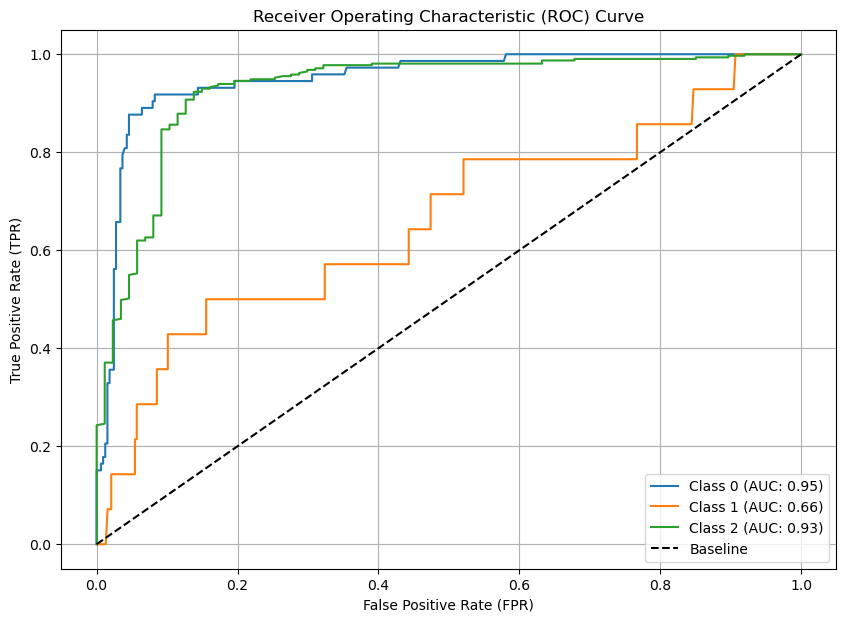

In [155]:
#Now we will plot the graph
#Assume y_test and y_prob are given
# Example class labels: [0, 1, 2]
classes = [0, 1, 2]  # Replace with your actual class labels
y_test_binarized = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10, 7))  # Customize figure size

# Plot ROC curve for each class
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)  # Compute AUC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC: {roc_auc:.2f})")

# Add a diagonal line for the baseline
plt.plot([0, 1], [0, 1], 'k--', label="Baseline")

# Customize the plot
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")  # Place the legend
plt.grid(True)  # Add grid for better readability
plt.show()

In [157]:
print(classification_report(y_test,y_preds)) # Clculated on one split

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        73
           1       0.00      0.00      0.00        14
           2       0.93      0.96      0.94       313

    accuracy                           0.90       400
   macro avg       0.58      0.59      0.59       400
weighted avg       0.87      0.90      0.89       400



### Feature importance
Feature importance is anothe as askinh,"which features contributed most to the outcome of the model and how did they contribute ?"

Fiding feature importance is diffrent for each machine learning modelOn way to find feature importance to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticReggression model...

In [158]:
gs_log_reg.best_params_

{'C': np.float64(221.22162910704503), 'solver': 'liblinear'}

In [159]:
# Fit an instance of Logistic Regression

clf = LogisticRegression(C = np.float64(221.22162910704503), solver = 'liblinear')

clf.fit(x_train,y_train)

LogisticRegression(C=np.float64(221.22162910704503), solver='liblinear')

In [160]:
#Chech coef_
clf.coef_

array([[ 0.        , -0.42747574, -0.22923071, ..., -2.40828152,
         0.        ,  6.38992732],
       [ 0.        , -0.03388989, -0.01067053, ..., -3.20523954,
         0.        ,  1.06592538],
       [ 0.        ,  0.36877143,  0.12213782, ...,  5.18927866,
         0.        , -7.3984404 ]], shape=(3, 1653))

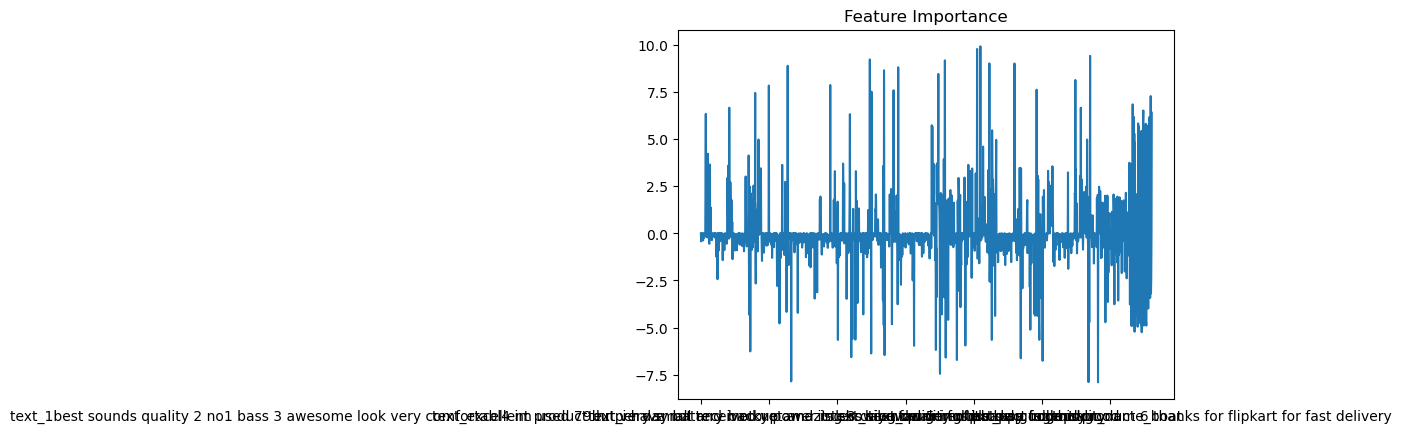

In [162]:
# Visualize feature imporatance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.line(title="Feature Importance",legend=False)
plt.show()